# NOTEBOOK EN R
 Dans ce notebook nous nous contenterons de commenter les rôles des commandes. 
 Les resultats ne sont pas interpretés dans ce notebook (Voir Notebook en python). Ces deux notebook (R et Python)  sont complémentaires.

# Partie 1 : Analyse exploratoire des données
Dans cette partie, nous ferons du data mining sur les données.

In [19]:
# Il faut s'assurer que le fichier R et les données sont dans le même repertoire
setwd("C:/Users/lenovo/Desktop/Valdom/Machine Learning/TP Machine Learning") # le repertoire courant ou se trouve le fichier

In [20]:

# Lecture des données
library(readr)
data <- read_csv("DataEnergy.csv")

Parsed with column specification:
cols(
  Relative.compactness = col_double(),
  Surface.area = col_double(),
  Wall.area = col_double(),
  Roof.area = col_double(),
  Overall.height = col_double(),
  orientation = col_character(),
  Glazing.area = col_double(),
  Glazing.area.distr = col_double(),
  Energy = col_double(),
  Energy.efficiency = col_character()
)



In [21]:
### Verification du contenu: statistique descriptive unidimentionnelle

head(data) # resumé des données
data$orientation=as.factor(data$orientation) # On transforme les variables qualitatives en facteur
data$Glazing.area.distr=as.factor(data$Glazing.area.distr)
data$Energy.efficiency=as.factor(data$Energy.efficiency)

summary(data) # Statistique descriptive

Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9835473            519.8724     299.7763  110.0480  7             
3 0.9794535            516.1912     303.3744  106.4084  7             
4 0.9777325            518.9241     292.8122  113.0559  7             
5 0.9030294            552.9689     316.2361  118.3664  7             
6 0.8909102            558.6037     314.9162  121.8437  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 East        -9.386813e-03 0                  34.58975 B                
3 South       -6.974937e-04 0                  38.77805 C                
4 West         9.554434e-06 0                  37.94781 C                
5 North       -6.592326e-03 0                  47.67586 D                
6 East        -1.612145e-02 0                  41.90847 C

 Relative.compactness  Surface.area     Wall.area       Roof.area    
 Min.   :0.6125       Min.   :501.4   Min.   :234.3   Min.   :105.3  
 1st Qu.:0.6779       1st Qu.:598.7   1st Qu.:291.8   1st Qu.:137.4  
 Median :0.7517       Median :673.1   Median :315.8   Median :183.3  
 Mean   :0.7645       Mean   :671.3   Mean   :318.3   Mean   :176.5  
 3rd Qu.:0.8350       3rd Qu.:744.6   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9912       Max.   :826.0   Max.   :425.8   Max.   :225.8  
                                                                     
 Overall.height orientation  Glazing.area      Glazing.area.distr
 Min.   :3.50   East :192   Min.   :-0.02401   0: 48             
 1st Qu.:3.50   North:192   1st Qu.: 0.10306   1:144             
 Median :5.25   South:192   Median : 0.24752   2:144             
 Mean   :5.25   West :192   Mean   : 0.23435   3:144             
 3rd Qu.:7.00               3rd Qu.: 0.39119   4:144             
 Max.   :7.00               Max.   : 0.42702

In [22]:
#Tracage de la courbe3D des surfaces
library(rgl)

x = data$Surface.area
y = data$Wall.area  
z = data$Roof.area   
plot3d(x,y,z,type="p",col="red",xlab="Surface.area",ylab="Wall.area",zlab="Roof.area" ) 

# Le graphe est affiché dans une nouvelle fenêtre

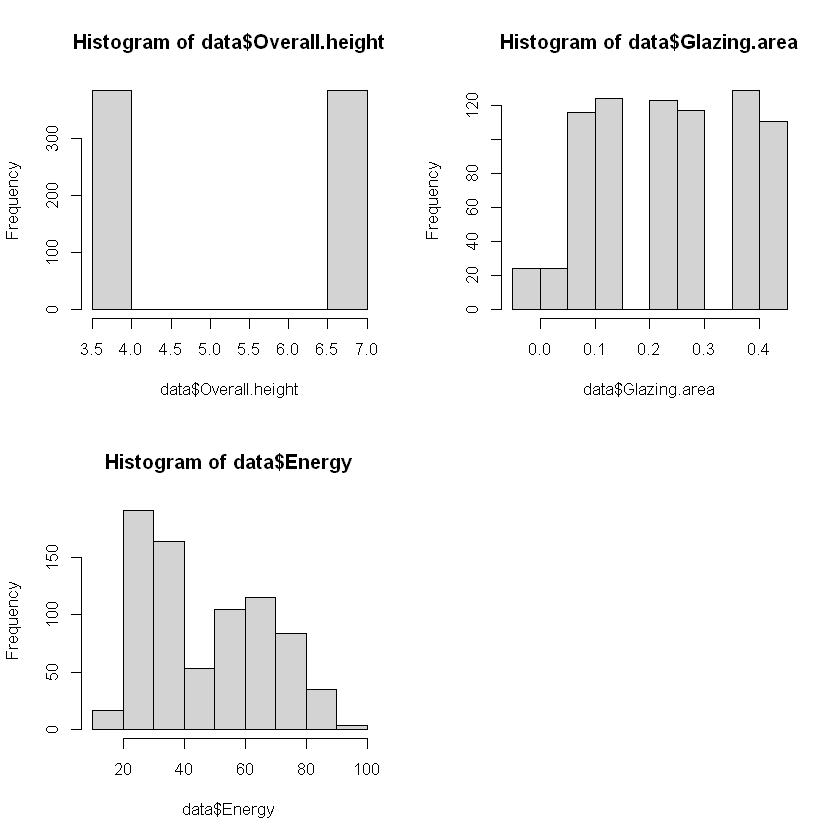

In [46]:
# Distribution des variables quantitatives

par(mfrow = c(2, 2))
options(repr.plot.width = 7, repr.plot.height = 7)
hist(data$Relative.compactness)
hist(data$Surface.area)
hist(data$Wall.area)
hist(data$Roof.area)
hist(data$Overall.height)
#hist(data$orientation)
hist(data$Glazing.area)
#hist(data$Glazing.area.distr)
hist(data$Energy)
#hist(data$Energy.efficiency)


In [45]:
# Statistique descriptive multidimentionnnelle
options(repr.plot.width = 7, repr.plot.height = 7)
pairs(data[,1:10]) # nuage des points des variables deux à deux permettant de voir la correlation entre les variables
library(GGally)
ggcorr(data) #Correlation entre les variables quantitatives


# Quelles sont les anomalies qu'on peut observer dans le jeu de données????

Warning message in ggcorr(data):
"data in column(s) 'orientation', 'Glazing.area.distr', 'Energy.efficiency' are not numeric and were ignored"


In [25]:
#ACP Reduite sur les variables quantitatives 
data1=data[, c(1,2,3,4,5,7,9)]
print(data1)
library("FactoMineR")
pca <- PCA(data1,scale.unit = TRUE, ncp = 2, graph =FALSE) # Toutes les variables sont centrées et reduites
print(pca)
library("factoextra")


# A tibble: 768 x 7
   Relative.compac~ Surface.area Wall.area Roof.area Overall.height Glazing.area
              <dbl>        <dbl>     <dbl>     <dbl>          <dbl>        <dbl>
 1            0.983         530.      306.      112.              7   0.0161    
 2            0.984         520.      300.      110.              7  -0.00939   
 3            0.979         516.      303.      106.              7  -0.000697  
 4            0.978         519.      293.      113.              7   0.00000955
 5            0.903         553.      316.      118.              7  -0.00659   
 6            0.891         559.      315.      122.              7  -0.0161    
 7            0.903         560.      321.      119.              7  -0.00248   
 8            0.899         569.      323.      123.              7  -0.00259   
 9            0.859         592.      299.      147.              7   0.00904   
10            0.855         596.      299.      149.              7  -0.00954   
# ... wi

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

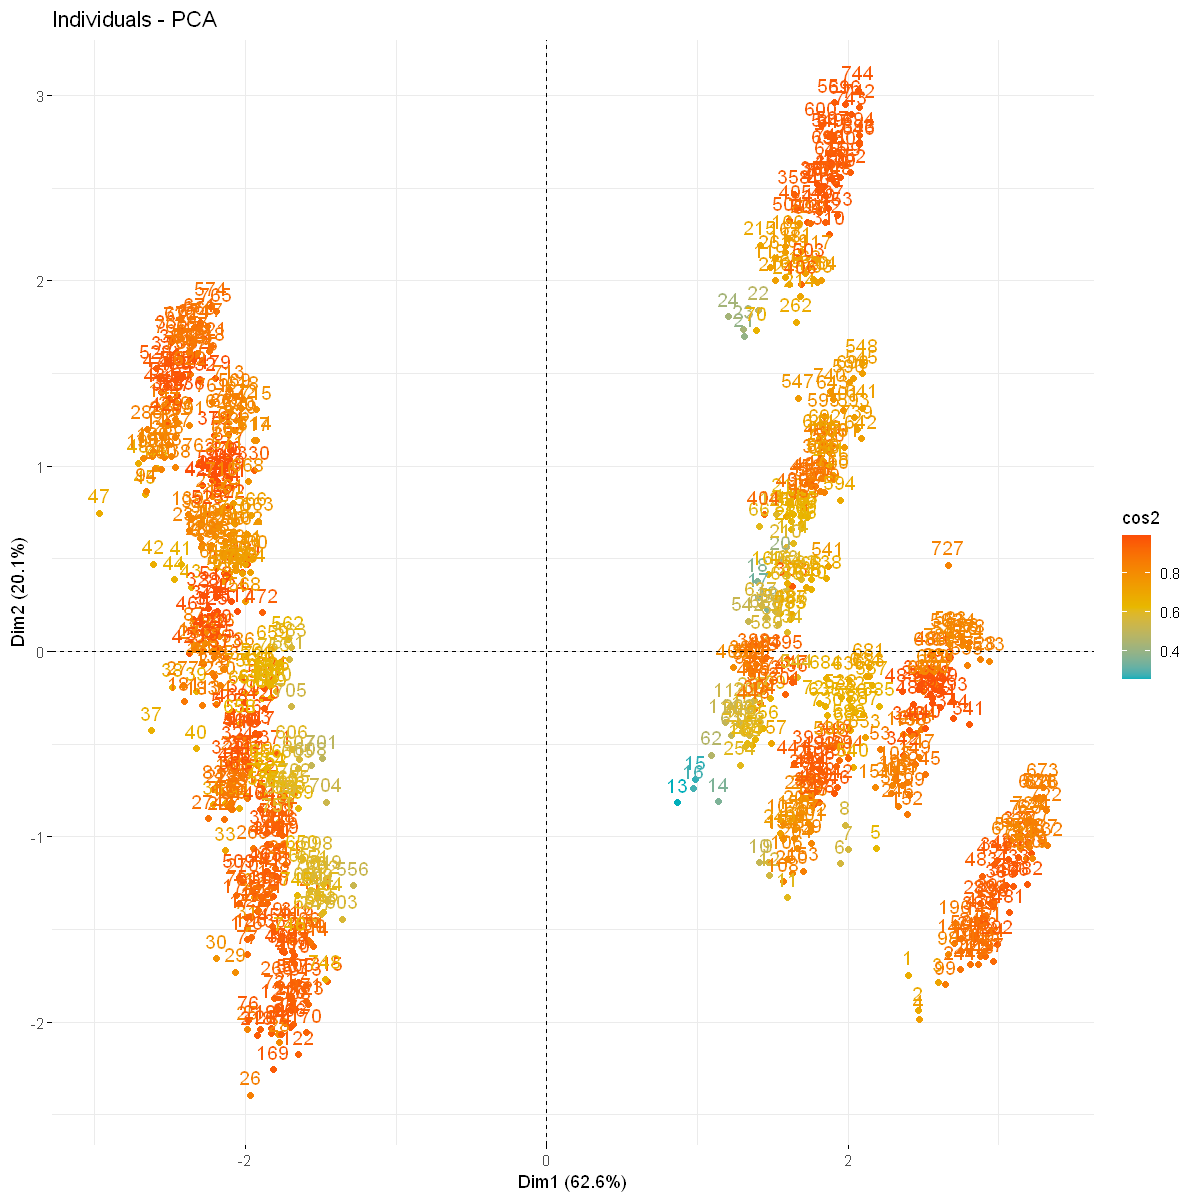

In [26]:
#1) Ajustement des nuages de point des individus dans l'espace des variables
ind <- get_pca_ind(pca)
ind

#Graphique des individus dans le plan en fonction de leur valeur de cosinus
fviz_pca_ind (pca, col.ind = "cos2",
              gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
              repel = FALSE # Évite le chevauchement de texte
)


Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

Dim.1       Dim.2      
Relative.compactness  0.90676085 -0.39270864
Surface.area         -0.92364064  0.37727168
Wall.area             0.17129083  0.93926862
Roof.area            -0.98445147 -0.08839342
Overall.height        0.97637871  0.10970825
Glazing.area          0.06191163  0.23927768
Energy                0.86832994  0.38547360

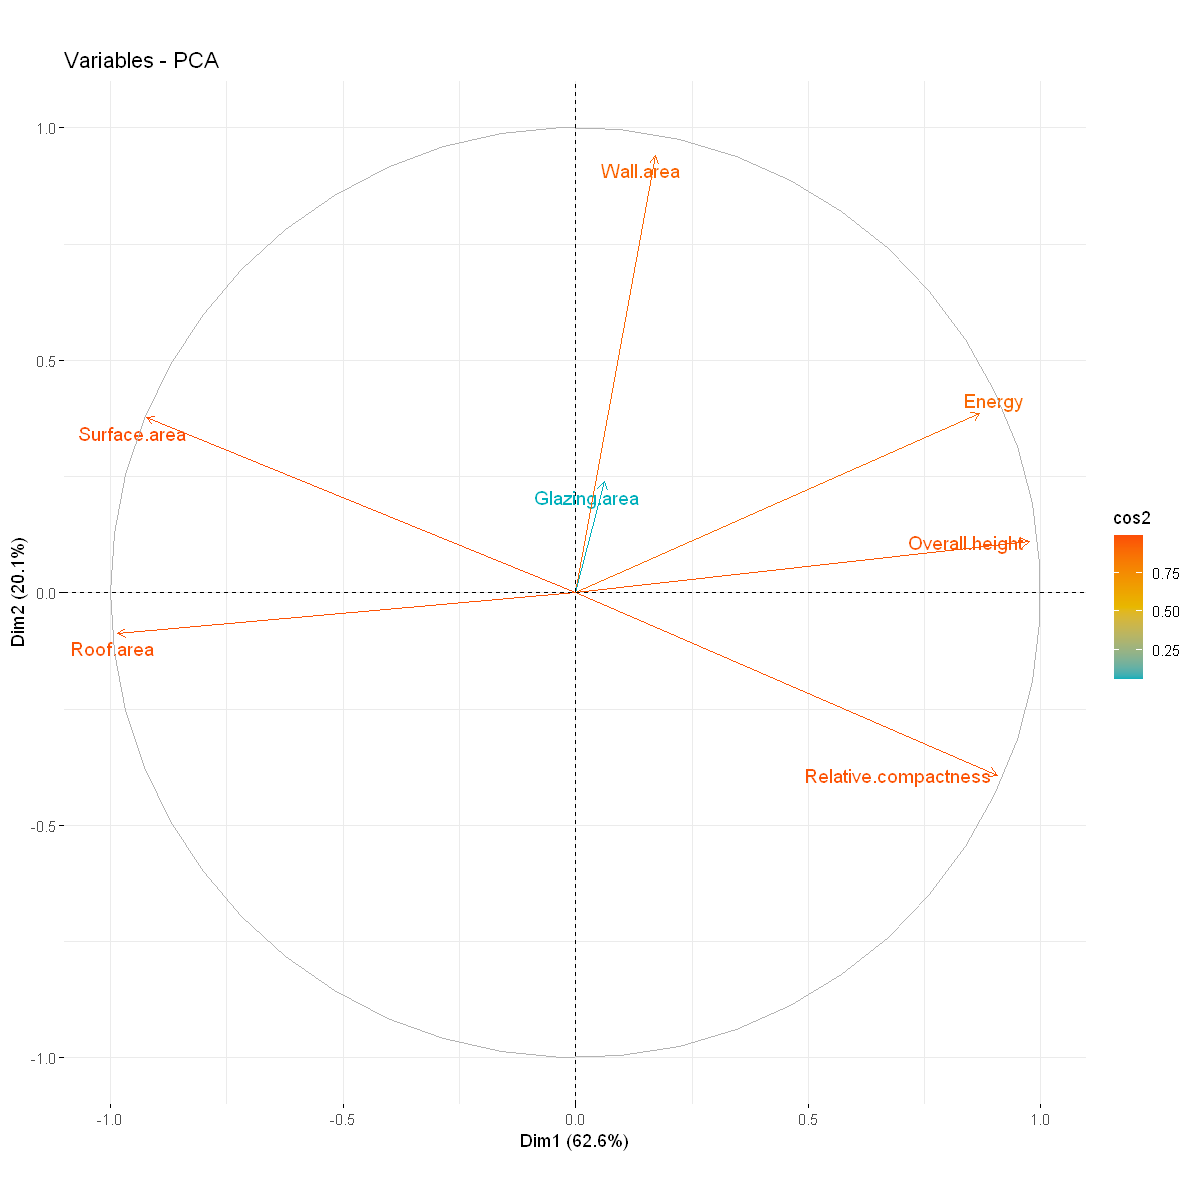

In [27]:
#2) Ajustement des nuages de point des variables dans l'espace des individus
var <- get_pca_var(pca)
var
var$cor
#Graphique des variables dans le plan en fonction de leur valeur de cosinus
fviz_pca_var (pca, col.var = "cos2",
              gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
              repel = TRUE # Évite le chevauchement de texte
)


In [28]:
##### Cluster analysis: kmeans method
library(cluster)
library(factoextra)
mydata<-scale(data[, c(1,2,3,4,5,7,9)]) # normalisation des données
fviz_nbclust(mydata, kmeans, method="gap_stat") # Nombre de Cluster, le graphe nous montre deux classes



In [29]:
# Formation des clusters
set.seed(123)# Fixe le choix aléatoire
km.res<-kmeans(mydata, 2, nstart=25) #Application de la méthode de Clustering
fviz_cluster(km.res, data=mydata, palette="jco",ggtheme=theme_minimal())
pam.res<-pam(mydata, 2) 
fviz_cluster(pam.res) # Meilleur affichage



# Partie 2: Machine Learning 
Dans cette partie, nous considerons le problème de prediction avec un point de vue de Machine Learning c'est à dire en se concentrant sur la performance des modèles.


## Importation des librairies

In [30]:
# Importation des libraries necessaires pour l'exeution des codes
library (Deducer)
library(caret)
library(ROCR)
library(MASS)
library(pROC)
library(rpart)
library(rpart.plot)

## Processus de Division du jeux de données: Apprentissage-Test

In [31]:


#dimension des données
dim(data)
#fréquences relatives des classes
print(prop.table(table(data$Energy.efficiency)))
#set.seed pour rendre reproductible les résultats 
set.seed(100) 
print(set.seed(100))

#On Partitionne les données en données d'apprentissage et de test. 
y=data$Energy.efficiency
print(length(y))
library(caret)
library(e1071)
partition <- createDataPartition(y, times = 1, p = 0.7, list =F) 




[1] 768  10


        A         B         C         D         E         F         G 
0.2708333 0.1419271 0.1041667 0.1028646 0.1419271 0.1328125 0.1054688 
NULL
[1] 768


## Subdivision apprentissage-test

In [32]:


#data frame pour les individus en apprentissage
DataTrain <- data[partition,] 
print(dim(DataTrain))
head(DataTrain)

#data frame pour les individus en test
DataTest <- data[-partition,] 
print(dim(DataTest))
head(DataTest)

#fréquences absolues des classes - éch. d'apprentissage
print(table(DataTrain$Energy.efficiency))

#fréquences relatives des classes dans l'éch. d'apprentissage 
print(prop.table(table(DataTrain$Energy.efficiency)))

#fréquences absolues des classes - éch. Test
print(table(DataTest$Energy.efficiency))

#fréquences relatives des classes - éch. Test
print(prop.table(table(DataTest$Energy.efficiency)))



[1] 541  10


Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9835473            519.8724     299.7763  110.0480  7             
2 0.8909102            558.6037     314.9162  121.8437  7             
3 0.9031505            559.7491     320.9447  119.4022  7             
4 0.8986191            568.6171     322.6710  122.9730  7             
5 0.8585792            591.9233     298.6293  146.6470  7             
6 0.8690866            594.1381     297.4385  148.3498  7             
  orientation Glazing.area Glazing.area.distr Energy   Energy.efficiency
1 East        -0.009386813 0                  34.58975 B                
2 East        -0.016121452 0                  41.90847 C                
3 South       -0.002477763 0                  40.34359 C                
4 West        -0.002594800 0                  44.14549 C                
5 North        0.009041387 0                  46.84383 D                
6 West        -0.002468433 0                  46.62123 D

[1] 227  10


Relative.compactness Surface.area Wall.area Roof.area Overall.height
1 0.9829276            530.4900     306.4846  112.0027  7             
2 0.9794535            516.1912     303.3744  106.4084  7             
3 0.9777325            518.9241     292.8122  113.0559  7             
4 0.9030294            552.9689     316.2361  118.3664  7             
5 0.8554034            596.2685     298.7158  148.7764  7             
6 0.8594188            576.5754     291.1996  142.6879  7             
  orientation Glazing.area  Glazing.area.distr Energy   Energy.efficiency
1 North        1.609490e-02 0                  34.26394 B                
2 South       -6.974937e-04 0                  38.77805 C                
3 West         9.554434e-06 0                  37.94781 C                
4 North       -6.592326e-03 0                  47.67586 D                
5 East        -9.540551e-03 0                  46.98544 D                
6 South       -2.450551e-03 0                  47.78018 D


  A   B   C   D   E   F   G 
146  77  56  56  77  72  57 

        A         B         C         D         E         F         G 
0.2698706 0.1423290 0.1035120 0.1035120 0.1423290 0.1330869 0.1053604 

 A  B  C  D  E  F  G 
62 32 24 23 32 30 24 

        A         B         C         D         E         F         G 
0.2731278 0.1409692 0.1057269 0.1013216 0.1409692 0.1321586 0.1057269 


## Regression logistique multinomiale sans penalisation:

In [1]:
 




library(nnet)
# La variable  Energy ne fait pas partie
regmul= multinom(Energy.efficiency ~ Relative.compactness+Surface.area+Wall.area+Roof.area+
                   Overall.height+orientation+Glazing.area+  Glazing.area.distr, data = DataTrain)

summary(regmul) # resumé sur la regression
library(MASS)

# Selection du meilleur modèle automatique
stepAIC(regmul)
LogisticMeilleurModel<-multinom(Energy.efficiency ~ Relative.compactness + 
                                  Surface.area + Wall.area + Roof.area + Overall.height + Glazing.area, 
                                data = DataTrain)
summary(LogisticMeilleurModel)

## Performance de la regression logistique - Table de confusion
table(predict(LogisticMeilleurModel, newdata = DataTest), DataTest$Energy.efficiency)


#prediction 
pred <- predict(LogisticMeilleurModel,newdata=DataTest) 
pred


# weights:  112 (90 variable)
initial  value 1052.737391 
iter  10 value 830.412612
iter  20 value 681.778059
iter  30 value 525.995305
iter  40 value 505.762065
iter  50 value 492.787036
iter  60 value 487.477692
iter  70 value 484.680912
iter  80 value 480.730229
iter  90 value 478.486643
iter 100 value 476.051254
final  value 476.051254 
stopped after 100 iterations


Call:
multinom(formula = Energy.efficiency ~ Relative.compactness + 
    Surface.area + Wall.area + Roof.area + Overall.height + orientation + 
    Glazing.area + Glazing.area.distr, data = DataTrain)

Coefficients:
  (Intercept) Relative.compactness Surface.area   Wall.area    Roof.area
B   -61.43471             8.302948  0.043272402 -0.02043303  0.031852715
C    11.12126           -36.734159 -0.024584202  0.01814545 -0.021364828
D   -36.03696           -36.907273 -0.001556404  0.01000618 -0.005781288
E    11.84979           -74.313954 -0.053660239  0.02414680 -0.038903517
F   -27.58773           -61.091014 -0.033536658  0.05455222 -0.044044447
G   -87.26154           -73.392619  0.020213242  0.03539862 -0.007592684
  Overall.height orientationNorth orientationSouth orientationWest Glazing.area
B       5.363387       0.02636832        0.1854603      0.04103636     9.168261
C       5.591918       0.57207748        0.4810412      0.54494786    11.714179
D      10.471925       0.37898483

Start:  AIC=1120.1
Energy.efficiency ~ Relative.compactness + Surface.area + Wall.area + 
    Roof.area + Overall.height + orientation + Glazing.area + 
    Glazing.area.distr

# weights:  105 (84 variable)
initial  value 1052.737391 
iter  10 value 830.421385
iter  20 value 663.113004
iter  30 value 537.995419
iter  40 value 514.856452
iter  50 value 501.023958
iter  60 value 492.919642
iter  70 value 487.757303
iter  80 value 486.628712
iter  90 value 485.073220
iter 100 value 483.809176
final  value 483.809176 
stopped after 100 iterations
# weights:  105 (84 variable)
initial  value 1052.737391 
iter  10 value 771.418710
iter  20 value 630.790096
iter  30 value 522.484196
iter  40 value 501.913986
iter  50 value 489.482618
iter  60 value 486.727900
iter  70 value 484.433088
iter  80 value 480.419554
iter  90 value 477.809306
iter 100 value 476.396859
final  value 476.396859 
stopped after 100 iterations
# weights:  105 (84 variable)
initial  value 1052.737391 
iter  10 value 721.66

Warning message in stepAIC(regmul):
"0 df terms are changing AIC"


                       Df    AIC
- orientation          18 1092.8
- Glazing.area.distr   30 1101.1
<none>                    1120.1
- Relative.compactness  6 1123.6
- Overall.height        6 1167.2
- Glazing.area          6 1268.9
# weights:  91 (72 variable)
initial  value 1052.737391 
iter  10 value 830.415744
iter  20 value 665.306071
iter  30 value 526.464789
iter  40 value 505.676997
iter  50 value 495.010507
iter  60 value 489.974545
iter  70 value 486.111798
iter  80 value 483.784174
iter  90 value 481.181117
iter 100 value 480.418902
final  value 480.418902 
stopped after 100 iterations

Step:  AIC=1092.84
Energy.efficiency ~ Relative.compactness + Surface.area + Wall.area + 
    Roof.area + Overall.height + Glazing.area + Glazing.area.distr

# weights:  84 (66 variable)
initial  value 1052.737391 
iter  10 value 830.424516
iter  20 value 677.622876
iter  30 value 540.149628
iter  40 value 516.215740
iter  50 value 504.305706
iter  60 value 492.904109
iter  70 value 491.953342


Warning message in stepAIC(regmul):
"0 df terms are changing AIC"


                       Df    AIC
- Glazing.area.distr   30 1074.3
- Relative.compactness  6 1092.6
<none>                    1092.8
- Overall.height        6 1138.3
- Glazing.area          6 1240.2
# weights:  56 (42 variable)
initial  value 1052.737391 
iter  10 value 830.422234
iter  20 value 663.942194
iter  30 value 521.815029
iter  40 value 511.083131
iter  50 value 506.604561
iter  60 value 505.052368
iter  70 value 501.880994
iter  80 value 501.387350
iter  90 value 501.182739
iter 100 value 501.174885
final  value 501.174885 
stopped after 100 iterations

Step:  AIC=1074.35
Energy.efficiency ~ Relative.compactness + Surface.area + Wall.area + 
    Roof.area + Overall.height + Glazing.area

# weights:  49 (36 variable)
initial  value 1052.737391 
iter  10 value 830.431007
iter  20 value 654.684665
iter  30 value 528.983716
iter  40 value 513.459720
iter  50 value 511.810859
iter  60 value 510.488910
iter  70 value 509.570919
iter  80 value 508.694142
iter  90 value 508.157477
it

Warning message in stepAIC(regmul):
"0 df terms are changing AIC"


                       Df    AIC
<none>                    1074.3
- Relative.compactness  6 1074.9
- Overall.height        6 1128.7
- Glazing.area          6 1274.4


Call:
multinom(formula = Energy.efficiency ~ Relative.compactness + 
    Surface.area + Wall.area + Roof.area + Overall.height + Glazing.area, 
    data = DataTrain)

Coefficients:
  (Intercept) Relative.compactness Surface.area    Wall.area    Roof.area
B  -56.953444            0.6060357  0.047119208 -0.032359718  0.039739458
C   10.884481          -38.5740980 -0.006370538 -0.002759058 -0.001805742
D  -33.294818          -36.5023914  0.007116705 -0.005357591  0.006237152
E    4.502826          -66.0816079 -0.033671667  0.009472052 -0.021571856
F  -29.986590          -56.3937790 -0.017982008  0.036727101 -0.027354565
G  -80.101367          -66.9367627  0.038191362  0.017074272  0.010558550
  Overall.height Glazing.area
B       5.668194     8.568307
C       4.905069    11.324610
D       9.794050    39.260206
E      11.157792    47.913565
F      12.224963    53.308802
G      15.449722    61.205819

Residual Deviance: 1002.35 
AIC: 1074.35 

# weights:  56 (42 variable)
initial  value 1052.737391 
iter  10 value 830.422234
iter  20 value 663.942194
iter  30 value 521.815029
iter  40 value 511.083131
iter  50 value 506.604561
iter  60 value 505.052368
iter  70 value 501.880994
iter  80 value 501.387350
iter  90 value 501.182739
iter 100 value 501.174885
final  value 501.174885 
stopped after 100 iterations


Call:
multinom(formula = Energy.efficiency ~ Relative.compactness + 
    Surface.area + Wall.area + Roof.area + Overall.height + Glazing.area, 
    data = DataTrain)

Coefficients:
  (Intercept) Relative.compactness Surface.area    Wall.area    Roof.area
B  -56.953444            0.6060357  0.047119208 -0.032359718  0.039739458
C   10.884481          -38.5740980 -0.006370538 -0.002759058 -0.001805742
D  -33.294818          -36.5023914  0.007116705 -0.005357591  0.006237152
E    4.502826          -66.0816079 -0.033671667  0.009472052 -0.021571856
F  -29.986590          -56.3937790 -0.017982008  0.036727101 -0.027354565
G  -80.101367          -66.9367627  0.038191362  0.017074272  0.010558550
  Overall.height Glazing.area
B       5.668194     8.568307
C       4.905069    11.324610
D       9.794050    39.260206
E      11.157792    47.913565
F      12.224963    53.308802
G      15.449722    61.205819

Std. Errors:
  (Intercept) Relative.compactness Surface.area   Wall.area   Roof.area
B  0.

   
     A  B  C  D  E  F  G
  A 52 14  5  0  0  0  0
  B  5  6  3  1  0  0  0
  C  5 12 14  3  0  0  0
  D  0  0  2 10  7  3  1
  E  0  0  0  5 13  8  2
  F  0  0  0  2  9 13  7
  G  0  0  0  2  3  6 14

[1] C C C C B C D F F A A A A A A A A A A A A D D D D D D D F F A A A A A A D
 [38] E E A A A A A A D D D A A A A A A A A D D D D D F A A A A D D D D D E D E
 [75] E F F A A A A A A E E E F G G F F F A A A A A B A C E E E G G G A A A A A
[112] B C F E E E E A A A A E E E F E F G A A A A B A A C C B F F E E E E G G G
[149] A A A A A C C F E G G G G A C C C C C C C F E F F G G G G A B B B C C C C
[186] C F F F F G G G A B B B C B C C C C F F F F E G G B C B C C C F F F E E G
[223] G G B C C
Levels: A B C D E F G

## Arbre binaire optimal:

n= 541 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 541 395 A (0.27 0.14 0.1 0.1 0.14 0.13 0.11)  
   2) Roof.area>=183.3084 270 124 A (0.54 0.27 0.18 0.0037 0 0 0)  
     4) Glazing.area< 0.2526811 152  40 A (0.74 0.19 0.072 0 0 0 0)  
       8) Wall.area< 326.1107 101  10 A (0.9 0.099 0 0 0 0 0) *
       9) Wall.area>=326.1107 51  30 A (0.41 0.37 0.22 0 0 0 0)  
        18) Relative.compactness< 0.629806 26   7 A (0.73 0.27 0 0 0 0 0) *
        19) Relative.compactness>=0.629806 25  13 B (0.08 0.48 0.44 0 0 0 0)  
          38) Glazing.area.distr=0,1,3 13   5 B (0.15 0.62 0.23 0 0 0 0) *
          39) Glazing.area.distr=2,4,5 12   4 C (0 0.33 0.67 0 0 0 0) *
     5) Glazing.area>=0.2526811 118  73 B (0.29 0.38 0.32 0.0085 0 0 0)  
      10) Wall.area< 321.5126 78  41 B (0.35 0.47 0.18 0 0 0 0)  
        20) Glazing.area.distr=5 20   7 A (0.65 0.35 0 0 0 0 0)  
          40) Surface.area< 731.1218 11   0 A (1 0 0 0 0 0 0) *
          41) Surface.area>

Call:
rpart(formula = Energy.efficiency ~ Relative.compactness + Surface.area + 
    Wall.area + Roof.area + Overall.height + orientation + Glazing.area + 
    Glazing.area.distr, data = DataTrain)
  n= 541 

          CP nsplit rel error    xerror       xstd
1 0.19493671      0 1.0000000 1.0000000 0.02613841
2 0.11645570      1 0.8050633 0.8379747 0.02869643
3 0.04050633      2 0.6886076 0.6936709 0.02943982
4 0.03417722      5 0.5670886 0.7037975 0.02943097
5 0.02531646      7 0.4987342 0.6227848 0.02932127
6 0.01518987      8 0.4734177 0.5670886 0.02900400
7 0.01265823     10 0.4430380 0.5544304 0.02890375
8 0.01012658     14 0.3924051 0.5493671 0.02886069
9 0.01000000     15 0.3822785 0.5164557 0.02853871

Variable importance
        Surface.area Relative.compactness            Roof.area 
                  24                   23                   16 
           Wall.area       Overall.height         Glazing.area 
                  15                   12                    8 
  Gl

n= 541 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 541 400 A (0.27 0.14 0.1 0.1 0.14 0.13 0.11)  
   2) Roof.area>=1.8e+02 270 120 A (0.54 0.27 0.18 0.0037 0 0 0)  
     4) Glazing.area< 0.25 152  40 A (0.74 0.19 0.072 0 0 0 0)  
       8) Wall.area< 3.3e+02 101  10 A (0.9 0.099 0 0 0 0 0) *
       9) Wall.area>=3.3e+02 51  30 A (0.41 0.37 0.22 0 0 0 0)  
        18) Relative.compactness< 0.63 26   7 A (0.73 0.27 0 0 0 0 0) *
        19) Relative.compactness>=0.63 25  13 B (0.08 0.48 0.44 0 0 0 0)  
          38) Glazing.area.distr=0,1,3 13   5 B (0.15 0.62 0.23 0 0 0 0) *
          39) Glazing.area.distr=2,4,5 12   4 C (0 0.33 0.67 0 0 0 0) *
     5) Glazing.area>=0.25 118  73 B (0.29 0.38 0.32 0.0085 0 0 0)  
      10) Wall.area< 3.2e+02 78  41 B (0.35 0.47 0.18 0 0 0 0)  
        20) Glazing.area.distr=5 20   7 A (0.65 0.35 0 0 0 0 0)  
          40) Surface.area< 7.3e+02 11   0 A (1 0 0 0 0 0 0) *
          41) Surface.area>=7.3e+02 9   2 B (0.22 

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  D   D   D   E   D   E   F   F   F   A   A   A   A   A   A   B   A   B   A   A 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  A   D   E   F   E   E   E   D   F   F   A   A   A   A   B   B   D   E   F   A 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  A   A   C   C   A   D   E   E   A   A   A   A   A   A   A   A   D   E   E   D 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  F   F   A   A   A   C   D   E   E   D   D   D   F   F   F   F   F   A   A   A 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  C   A   A   D   D   D   G   G   G   F   F   F   A   A   A   B   B   A   B   A 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  D   D   D   G   G   G   A   A   A   B   B   C   C   E   E   F   E   D   A   A 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  A   B   D   E   E   E   D   G   G   A   A   B   A   A   B   B   A   A   A   F 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  F   E   E   E   E   G   F   G   A   A   A   A   A   C   C   F   E   G   E   E 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  G   B   B   B   C   C   C   C   C   F   F   F   F   E   G   G   G   B   B   B 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  B   B   C   C   C   C   F   F   F   E   E   G   G   B   B   B   B   B   C   C 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  C   C   C   F   F   F   F   E   G   G   B   B   C   C   C   C   F   F   E   E 
221 222 223 224 225 226 227 
  E   E   E   G   B   C   C 
Levels: A B C D E F G

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E  F  G
         A 47  8  2  0  0  0  0
         B 12 14  3  0  0  0  0
         C  3  9 15  1  0  0  0
         D  0  1  4 11  7  0  0
         E  0  0  0 10 14 10  1
         F  0  0  0  1 10 15  9
         G  0  0  0  0  1  5 14

Overall Statistics
                                          
               Accuracy : 0.5727          
                 95% CI : (0.5055, 0.6379)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4905          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.7581  0.43750  0.62500  0.47826  0.43750  0.50000
Specificity            0.9394  0.92308  0.93596  0.94118  0.89231  0.89848
Pos Pred Value         0.8246  0.482

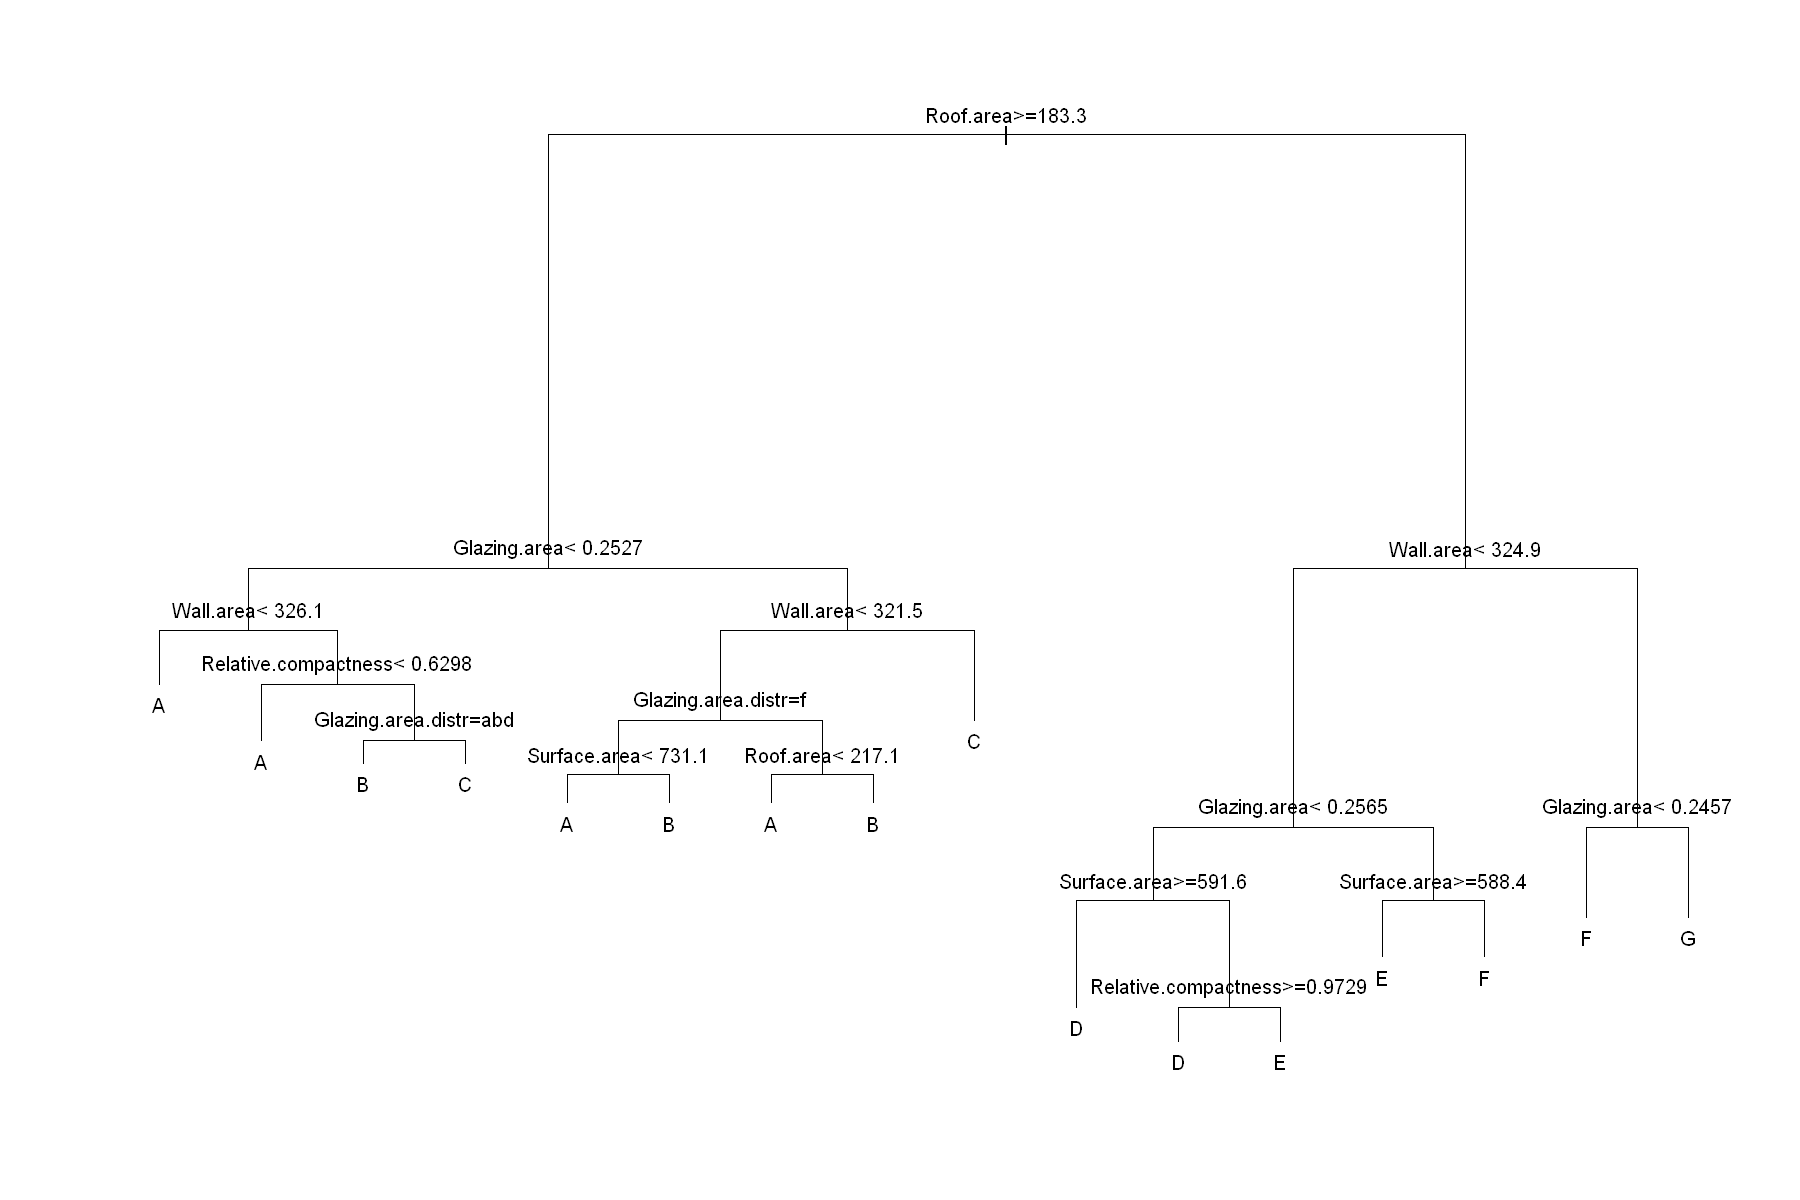

In [34]:

model<-rpart(Energy.efficiency~Relative.compactness+Surface.area+Wall.area+Roof.area+
               Overall.height+orientation+Glazing.area+  Glazing.area.distr,
             
            data =DataTrain)
model
summary(model)

par(xpd=NA)# sinon sur certains appareils, le texte est tronqué
options(repr.plot.width = 15, repr.plot.height = 10)
plot(model)
text(model, digits=3)
print(model, digits=2)
##Prediction et Performance de l'arbre binaire
pred1 <- predict(model,newdata=DataTest, type="class")
pred1
conf <- confusionMatrix(data = pred1, reference = DataTest$Energy.efficiency)
conf


## Random Forest

In [39]:

library(randomForest)

RF <- randomForest(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                     Overall.height+orientation+Glazing.area+  Glazing.area.distr, data = DataTrain, ntree = 500, na.action = na.omit)

summary(RF)
plot(RF)


#Prediction et performance du Random Forest
pred2 <- predict(RF,newdata=DataTest, type="class")
pred2
conf1 <- confusionMatrix(data = pred2, reference = DataTest$Energy.efficiency)
conf1


                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted        541   factor numeric  
err.rate        4000   -none- numeric  
confusion         56   -none- numeric  
votes           3787   matrix numeric  
oob.times        541   -none- numeric  
classes            7   -none- character
importance         8   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                541   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  D   D   D   C   D   D   F   D   F   A   A   A   A   A   A   C   A   C   A   A 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  A   D   E   E   E   E   E   D   F   F   A   A   A   A   B   B   D   E   F   A 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  A   A   C   B   A   D   D   D   A   A   A   A   A   A   A   A   D   E   E   D 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  G   F   A   A   A   B   D   E   E   D   E   D   G   G   G   F   F   A   A   A 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  C   B   A   E   E   D   G   G   G   F   G   F   A   A   A   A   A   A   C   A 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  E   E   D   G   G   G   A   A   A   A   A   C   A   E   E   F   D   D   A   A 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  A   B   E   F   E   D   D   F   G   A   A   B   A   A   A   B   B   A   B   F 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  F   E   E   D   E   G   F   G   A   A   A   A   A   C   A   F   E   E   D   E 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  G   A   C   B   C   C   C   B   B   E   E   F   F   E   G   F   G   A   C   A 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  B   B   C   C   C   B   F   F   F   E   F   G   G   B   B   B   B   B   C   C 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  C   C   C   F   F   F   F   E   G   F   B   B   B   B   B   A   E   F   E   F 
221 222 223 224 225 226 227 
  F   D   D   G   A   C   C 
Levels: A B C D E F G

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E  F  G
         A 52 12  2  0  0  0  0
         B  7 14  5  0  0  0  0
         C  3  5 13  2  0  0  0
         D  0  1  4 17  5  0  0
         E  0  0  0  3 17 11  1
         F  0  0  0  1  9 13  9
         G  0  0  0  0  1  6 14

Overall Statistics
                                          
               Accuracy : 0.6167          
                 95% CI : (0.5501, 0.6803)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5401          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.8387  0.43750  0.54167  0.73913  0.53125  0.43333
Specificity            0.9152  0.93846  0.95074  0.95098  0.92308  0.90355
Pos Pred Value         0.7879  0.538

## SVM: support vecteur machine

In [40]:

library(e1071)
svm.lin <- svm(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                 Overall.height+orientation+Glazing.area+  Glazing.area.distr , data = DataTrain, type = "C", kernel = "linear", cross = 5)
summary(svm.lin)


svm.poly <- svm(Energy.efficiency ~Relative.compactness+Surface.area+Wall.area+Roof.area+
                  Overall.height+orientation+Glazing.area+  Glazing.area.distr , data = DataTrain, type = "C", kernel = "poly", cross = 5)
summary(svm.poly)

#Prediction et Performance du SVM
pred3 <- predict(svm.lin,newdata=DataTest, type="class")
pred3
conf2 <- confusionMatrix(data = pred2, reference = DataTest$Energy.efficiency)
conf2



Call:
svm(formula = Energy.efficiency ~ Relative.compactness + Surface.area + 
    Wall.area + Roof.area + Overall.height + orientation + Glazing.area + 
    Glazing.area.distr, data = DataTrain, type = "C", kernel = "linear", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  434

 ( 75 56 53 76 66 72 36 )


Number of Classes:  7 

Levels: 
 A B C D E F G

5-fold cross-validation on training data:

Total Accuracy: 50.46211 
Single Accuracies:
 53.7037 43.51852 54.62963 45.37037 55.04587 





Call:
svm(formula = Energy.efficiency ~ Relative.compactness + Surface.area + 
    Wall.area + Roof.area + Overall.height + orientation + Glazing.area + 
    Glazing.area.distr, data = DataTrain, type = "C", kernel = "poly", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  488

 ( 77 56 56 77 72 97 53 )


Number of Classes:  7 

Levels: 
 A B C D E F G

5-fold cross-validation on training data:

Total Accuracy: 46.58041 
Single Accuracies:
 50 50.92593 36.11111 50 45.87156 




1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  D   D   D   D   D   D   D   F   F   A   A   A   A   A   A   A   A   A   A   A 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  A   E   E   D   D   D   D   D   F   F   A   A   A   A   A   A   E   D   D   A 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  A   A   A   A   A   D   D   D   A   A   A   A   A   A   A   A   E   E   D   E 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  E   F   A   A   A   A   E   D   D   D   D   D   D   D   D   F   F   A   A   A 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  A   A   A   E   E   E   G   G   G   G   G   G   A   A   A   A   A   A   B   C 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  E   E   E   G   G   F   A   A   A   A   A   B   C   F   E   D   E   E   A   A 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  A   A   E   E   E   E   E   G   G   A   A   B   B   B   B   B   B   B   B   E 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  F   E   E   E   E   G   G   F   A   A   A   A   A   A   A   F   E   G   G   G 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  G   B   C   C   C   C   C   C   C   F   F   F   F   G   G   G   G   B   B   B 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  B   C   C   C   C   C   F   F   F   F   E   G   G   B   B   B   B   C   B   C 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 
  C   C   C   E   F   F   F   E   G   G   B   B   B   B   C   C   F   F   E   E 
221 222 223 224 225 226 227 
  F   G   G   G   A   A   B 
Levels: A B C D E F G

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E  F  G
         A 52 12  2  0  0  0  0
         B  7 14  5  0  0  0  0
         C  3  5 13  2  0  0  0
         D  0  1  4 17  5  0  0
         E  0  0  0  3 17 11  1
         F  0  0  0  1  9 13  9
         G  0  0  0  0  1  6 14

Overall Statistics
                                          
               Accuracy : 0.6167          
                 95% CI : (0.5501, 0.6803)
    No Information Rate : 0.2731          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5401          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E Class: F
Sensitivity            0.8387  0.43750  0.54167  0.73913  0.53125  0.43333
Specificity            0.9152  0.93846  0.95074  0.95098  0.92308  0.90355
Pos Pred Value         0.7879  0.538

## Regression Linéaire multiple

In [41]:

Reg=lm( Energy~Relative.compactness+Surface.area+Wall.area+Roof.area+
          Overall.height+orientation+Glazing.area+  Glazing.area.distr ,data=DataTrain)

summary(Reg)
# Selection du meilleur modèle automatique
library(MASS)
stepAIC(Reg)
RegMeilleur=lm( Energy~Relative.compactness+Surface.area+Wall.area+
                  Overall.height+Glazing.area+  Glazing.area.distr ,data=DataTrain)
summary(RegMeilleur) # Toutes les variables sont significatives
#prediction 
pre <- predict(RegMeilleur,newdata=DataTest) 
pre

# Classification à partir des valeurs predites par la regression en respectant le seuillage donné par l'énoncé.
Class_pred=function(p) {
  y_pred_class =c()
for (val in p) { 
  if (val < 30)
  y_pred_class= c('A')
  
  else if (val < 35)
    y_pred_class= c('B')
  else if (val < 45)
    y_pred_class= c('C')
else if (val < 55)
  y_pred_class= c('D')
else if (val < 65)
  y_pred_class= c('E')
else if (val < 75)
  y_pred_class= c('F')
else
  y_pred_class= c('G')
  
 print( y_pred_class)
}
   
}
Class_pred(pre) # Classification pour chaque valeur predite en respectant le seuillage.



Call:
lm(formula = Energy ~ Relative.compactness + Surface.area + Wall.area + 
    Roof.area + Overall.height + orientation + Glazing.area + 
    Glazing.area.distr, data = DataTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3703  -4.4056  -0.0471   4.2299  24.9535 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           93.40543   38.95187   2.398 0.016833 *  
Relative.compactness -90.63818   21.20777  -4.274 2.28e-05 ***
Surface.area          -0.10200    0.03557  -2.867 0.004304 ** 
Wall.area              0.08800    0.01717   5.124 4.21e-07 ***
Roof.area                   NA         NA      NA       NA    
Overall.height         9.44738    0.82323  11.476  < 2e-16 ***
orientationNorth       0.44829    0.84404   0.531 0.595553    
orientationSouth      -0.41085    0.82726  -0.497 0.619654    
orientationWest       -0.33393    0.82304  -0.406 0.685109    
Glazing.area          32.

Start:  AIC=2102.78
Energy ~ Relative.compactness + Surface.area + Wall.area + Roof.area + 
    Overall.height + orientation + Glazing.area + Glazing.area.distr


Step:  AIC=2102.78
Energy ~ Relative.compactness + Surface.area + Wall.area + Overall.height + 
    orientation + Glazing.area + Glazing.area.distr

                       Df Sum of Sq   RSS    AIC
- orientation           3      58.5 25105 2098.0
<none>                              25047 2102.8
- Surface.area          1     390.8 25437 2109.2
- Glazing.area.distr    5    1105.2 26152 2116.1
- Relative.compactness  1     868.1 25915 2119.2
- Wall.area             1    1247.8 26294 2127.1
- Overall.height        1    6259.3 31306 2221.4
- Glazing.area          1    8241.9 33289 2254.7

Step:  AIC=2098.04
Energy ~ Relative.compactness + Surface.area + Wall.area + Overall.height + 
    Glazing.area + Glazing.area.distr

                       Df Sum of Sq   RSS    AIC
<none>                              25105 2098.0
- Surface.are


Call:
lm(formula = Energy ~ Relative.compactness + Surface.area + Wall.area + 
    Overall.height + Glazing.area + Glazing.area.distr, data = DataTrain)

Coefficients:
         (Intercept)  Relative.compactness          Surface.area  
            95.99705             -92.16861              -0.10439  
           Wall.area        Overall.height          Glazing.area  
             0.08881               9.41232              32.75273  
 Glazing.area.distr1   Glazing.area.distr2   Glazing.area.distr3  
             7.46082               6.32809               6.31552  
 Glazing.area.distr4   Glazing.area.distr5  
             7.08261               5.79756  



Call:
lm(formula = Energy ~ Relative.compactness + Surface.area + Wall.area + 
    Overall.height + Glazing.area + Glazing.area.distr, data = DataTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.2012  -4.3293  -0.1397   4.3275  25.4893 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           95.99705   38.81335   2.473 0.013700 *  
Relative.compactness -92.16861   21.12284  -4.363 1.54e-05 ***
Surface.area          -0.10439    0.03544  -2.945 0.003368 ** 
Wall.area              0.08881    0.01713   5.186 3.07e-07 ***
Overall.height         9.41232    0.82102  11.464  < 2e-16 ***
Glazing.area          32.75273    2.47766  13.219  < 2e-16 ***
Glazing.area.distr1    7.46082    1.62307   4.597 5.37e-06 ***
Glazing.area.distr2    6.32809    1.60100   3.953 8.78e-05 ***
Glazing.area.distr3    6.31552    1.60107   3.945 9.07e-05 ***
Glazing.area.distr4    7.08261    1.60803   4.405 1.28e-05 ***
Glazing.area.distr5    5.79756    

1        2        3        4        5        6        7        8 
43.65623 44.64285 43.60136 48.79672 47.01389 48.26427 53.21496 59.23887 
       9       10       11       12       13       14       15       16 
60.43217 11.17412 13.30127 13.63633 16.98195 16.63866 17.76588 18.49076 
      17       18       19       20       21       22       23       24 
18.91793 18.01802 19.96205 19.69376 19.50796 53.86588 59.30597 58.67188 
      25       26       27       28       29       30       31       32 
57.32733 58.24718 56.88621 61.87848 71.04494 69.80850 20.02199 21.04433 
      33       34       35       36       37       38       39       40 
21.04203 22.77705 28.42730 30.02218 52.06708 58.53299 63.42254 19.96941 
      41       42       43       44       45       46       47       48 
23.47649 25.04332 29.22099 27.40492 29.53992 52.97045 54.41962 57.36698 
      49       50       51       52       53       54       55       56 
19.69605 19.87077 22.55773 25.60964 26.74703 25.26202 29.53295 29.04538 
      57       58       59       60       61       62       63       64 
53.83487 57.84620 57.12701 59.93371 62.67959 68.82300 21.93757 25.64877 
      65       66       67       68       69       70       71       72 
24.23095 27.99407 53.68587 56.57047 57.60855 54.41979 55.75290 60.71774 
      73       74       75       76       77       78       79       80 
62.97404 62.72644 63.27119 68.23060 68.57929 18.06326 23.07865 25.77929 
      81       82       83       84       85       86       87       88 
27.55426 28.45690 29.60495 58.18796 59.79269 66.40619 66.87678 68.60240 
      89       90       91       92       93       94       95       96 
68.29996 75.69275 74.18034 75.85114 26.18035 25.62943 26.72986 28.23624 
      97       98       99      100      101      102      103      104 
30.28179 32.00840 33.27645 35.93773 57.89647 57.92005 64.32367 67.75376 
     105      106      107      108      109      110      111      112 
74.42180 74.52545 24.70356 24.79646 27.69506 26.74368 32.16762 32.14222 
     113      114      115      116      117      118      119      120 
35.25085 63.48285 62.43717 62.54625 65.13835 65.10682 26.98674 29.32034 
     121      122      123      124      125      126      127      128 
31.40811 32.19823 59.02571 63.72988 62.25749 65.84597 65.69095 75.62694 
     129      130      131      132      133      134      135      136 
74.60099 25.20808 29.10485 30.83612 30.58302 32.83722 32.67218 33.23955 
     137      138      139      140      141      142      143      144 
34.79409 35.58557 34.77231 62.43321 62.24142 61.77712 60.98400 64.96357 
     145      146      147      148      149      150      151      152 
65.33793 66.64093 74.72667 73.83823 24.83702 29.06719 29.22158 30.86982 
     153      154      155      156      157      158      159      160 
31.06344 33.55196 34.30784 69.13417 67.55169 70.72980 70.70515 70.57059 
     161      162      163      164      165      166      167      168 
72.50807 31.24431 37.74856 37.72182 39.54645 39.33623 39.18818 40.66759 
     169      170      171      172      173      174      175      176 
40.67342 62.99195 63.15152 67.11734 67.67993 69.55905 71.24560 79.08353 
     177      178      179      180      181      182      183      184 
78.94482 31.43775 33.12123 34.13203 34.46796 36.22389 38.02372 37.54312 
     185      186      187      188      189      190      191      192 
38.36615 39.84122 63.31545 66.99323 68.75274 65.53369 71.44732 71.48324 
     193      194      195      196      197      198      199      200 
79.12017 30.60268 30.31091 32.86664 34.06925 37.54871 35.93631 38.50056 
     201      202      203      204      205      206      207      208 
38.10730 39.21484 39.87976 63.91518 68.14738 68.34905 67.95041 67.87506 
     209      210      211      212      213      214      215      216 
79.79040 80.80670 29.73279 37.16477 36.65612 38.97919 42.01273 40.08037 
     217      218      219      220      221      222      223   

[1] "C"
[1] "C"
[1] "C"
[1] "D"
[1] "D"
[1] "D"
[1] "D"
[1] "E"
[1] "E"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "D"
[1] "E"
[1] "E"
[1] "E"
[1] "E"
[1] "E"
[1] "E"
[1] "F"
[1] "F"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "B"
[1] "D"
[1] "E"
[1] "E"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "D"
[1] "D"
[1] "E"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "D"
[1] "E"
[1] "E"
[1] "E"
[1] "E"
[1] "F"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "D"
[1] "E"
[1] "E"
[1] "D"
[1] "E"
[1] "E"
[1] "E"
[1] "E"
[1] "E"
[1] "F"
[1] "F"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "E"
[1] "E"
[1] "F"
[1] "F"
[1] "F"
[1] "F"
[1] "G"
[1] "F"
[1] "G"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "B"
[1] "B"
[1] "B"
[1] "C"
[1] "E"
[1] "E"
[1] "E"
[1] "F"
[1] "F"
[1] "F"
[1] "A"
[1] "A"
[1] "A"
[1] "A"
[1] "B"
[1] "B"
[1] "C"
[1] "E"
[1] "E"
[1] "E"
[1] "F"
[1] "F"
[1] "A"
[1] "A"
[1] "B"
[1] "B"
[1] "E"
[1] "E"
[1] "E"
